## Covid 19 Case Data - United States (CA & IN focus)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import os
import csv
import gmaps
from us import states
import numpy as np
import requests
from config import gkey
from config import rapid_api_key
from config import rapidapi_host
from pprint import pprint
import datetime as dt
import time

In [37]:
pd.options.display.max_rows = 4000
# pd.options.display.max_rows

In [38]:
# os.getcwd()
# os.chdir('C:\\gitlab\\covid19')

In [39]:
#Import files to use with API's
county_path = 'Resources/us_counties_states2.csv'
date_path = 'Resources/dates.csv'

In [40]:
# us_counties_df = pd.read_csv(county_path)
# Create a filter to bring in only California and Indiana
# mask1 = us_counties_df['State'] != 'California'
# mask2 = us_counties_df['State'] != 'Indiana'
# us_counties_df = us_counties_df[mask1 & mask2]
# us_counties_df.head()
us_counties_df = pd.read_csv(county_path)

In [41]:
date_df = pd.read_csv(date_path)

In [42]:
# mask1 = date_df['Date']<'2020-10-15'
# date_df=date_df[mask1]
# date_df.sort_values(by = 'Date', ascending=True, inplace = True)
# date_df

### API Calls to Pull Coronavirus Data by County

In [43]:
county_list = []
state_list = []
# map1 = us_counties_df['State']=='Nevada'
county_list = us_counties_df['County, State'].tolist()
date_list = date_df['Date'].tolist()
date_list = ['2020-11-18']

# date_list = []
# rundate = dt.date.today() - dt.timedelta(days=1)
# rundate = f'{rundate.year}-{rundate.month}-{rundate.day}'
# date_list.append(rundate)
date_list

['2020-11-18']

In [44]:
# state='Texas'
# county='Dickens'
# date_val = '2020-11-09'
# country_state = "US " + state
# #  "city_name":county,

# url = "https://covid-19-statistics.p.rapidapi.com/reports"
# headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}
# querystring = {"region_province":state,"iso":"USA","region_name":"US", "city_name":county, \
#                            "date":date_val,"q":country_state}   

# response = requests.request("GET", url, headers=headers, params=querystring).json()

# pprint(response)

In [45]:
# # Run API to collect county level data
url = "https://covid-19-statistics.p.rapidapi.com/reports"
headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}

# Map County Lists
map_county_state_list = []
map_new_county_list = []
map_tot_county_cases = []
map_new_county_cases = []
map_tot_county_deaths = []
map_new_county_deaths = []
map_county_date = []
map_county_lat = []
map_county_lng = []

# County Lists
county_state_list = []
new_county_list = []
tot_county_cases = []
new_county_cases = []
tot_county_deaths = []
new_county_deaths = []
county_date = []
county_lat = []
county_lng = []

record_counter = 0
set_counter = 1

for date_val in date_list:    
    try:        
#         set_counter += 1

        for name in county_list:
            value = name.split(',')
            county = value[0]
            state = value[1]
            country_state = "US " + state
            record_counter +=1

            querystring = {"region_province":state,"iso":"USA","region_name":"US","city_name":county, \
                           "date":date_val,"q":country_state}   

            response = requests.request("GET", url, headers=headers, params=querystring).json()    
            
#             time.sleep(1)
            
            try:
                # Add Map information
                map_county_state_list.append(response['data'][0]['region']['province'])
                map_new_county_list.append(response['data'][0]['region']['cities'][0]['name'])
                map_tot_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed'])
                map_new_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed_diff'])
                map_tot_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths'])
                map_new_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths_diff'])
                map_county_date.append(response['data'][0]['region']['cities'][0]['date'])
                map_county_lat.append(response['data'][0]['region']['cities'][0]['lat'])
                map_county_lng.append(response['data'][0]['region']['cities'][0]['long'])

                # Add County information
                county_state_list.append(response['data'][0]['region']['province'])
                new_county_list.append(response['data'][0]['region']['cities'][0]['name'])
                tot_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed'])
                new_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed_diff'])
                tot_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths'])
                new_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths_diff'])
                county_date.append(response['data'][0]['region']['cities'][0]['date'])
                county_lat.append(response['data'][0]['region']['cities'][0]['lat'])
                county_lng.append(response['data'][0]['region']['cities'][0]['long'])

                if record_counter > len(county_list):
                    record_counter = 1
                    set_counter += 1

                print(f'Processing record {record_counter} of set {set_counter} | {county}, {state}, {date_val}.')

            except:
                record_counter -= 1
                print(f'Error: County: {county} and State:{state} not found for: {date_val}')

#         set_counter += 1
        
    except:
        pass
        print(f'Date Error: {date_val} was not processed for {county},{state}')
        
            
print(f'---------------------------------Process Completed----------------------------------------')


Processing record 1 of set 1 | Lynn, Texas, 2020-11-18.
Processing record 2 of set 1 | McCulloch, Texas, 2020-11-18.
Processing record 3 of set 1 | McLennan, Texas, 2020-11-18.
Processing record 4 of set 1 | McMullen, Texas, 2020-11-18.
Processing record 5 of set 1 | Madison, Texas, 2020-11-18.
Processing record 6 of set 1 | Marion, Texas, 2020-11-18.
Processing record 7 of set 1 | Martin, Texas, 2020-11-18.
Processing record 8 of set 1 | Mason, Texas, 2020-11-18.
Processing record 9 of set 1 | Matagorda, Texas, 2020-11-18.
Processing record 10 of set 1 | Maverick, Texas, 2020-11-18.
Processing record 11 of set 1 | Medina, Texas, 2020-11-18.
Processing record 12 of set 1 | Menard, Texas, 2020-11-18.
Processing record 13 of set 1 | Midland, Texas, 2020-11-18.
Processing record 14 of set 1 | Milam, Texas, 2020-11-18.
Processing record 15 of set 1 | Mills, Texas, 2020-11-18.
Processing record 16 of set 1 | Mitchell, Texas, 2020-11-18.
Processing record 17 of set 1 | Montague, Texas, 2020-

Processing record 115 of set 1 | Franklin, Vermont, 2020-11-18.
Processing record 116 of set 1 | Grand Isle, Vermont, 2020-11-18.
Processing record 117 of set 1 | Lamoille, Vermont, 2020-11-18.
Processing record 118 of set 1 | Orange, Vermont, 2020-11-18.
Processing record 119 of set 1 | Orleans, Vermont, 2020-11-18.
Processing record 120 of set 1 | Rutland, Vermont, 2020-11-18.
Processing record 121 of set 1 | Washington, Vermont, 2020-11-18.
Processing record 122 of set 1 | Windham, Vermont, 2020-11-18.
Processing record 123 of set 1 | Windsor, Vermont, 2020-11-18.
Processing record 124 of set 1 | Accomack, Virginia, 2020-11-18.
Processing record 125 of set 1 | Albemarle, Virginia, 2020-11-18.
Processing record 126 of set 1 | Alleghany, Virginia, 2020-11-18.
Processing record 127 of set 1 | Amelia, Virginia, 2020-11-18.
Processing record 128 of set 1 | Amherst, Virginia, 2020-11-18.
Processing record 129 of set 1 | Appomattox, Virginia, 2020-11-18.
Processing record 130 of set 1 | Ar

Processing record 241 of set 1 | Martinsville, Virginia, 2020-11-18.
Processing record 242 of set 1 | Newport News, Virginia, 2020-11-18.
Processing record 243 of set 1 | Norfolk, Virginia, 2020-11-18.
Processing record 244 of set 1 | Norton, Virginia, 2020-11-18.
Processing record 245 of set 1 | Petersburg, Virginia, 2020-11-18.
Processing record 246 of set 1 | Poquoson, Virginia, 2020-11-18.
Processing record 247 of set 1 | Portsmouth, Virginia, 2020-11-18.
Processing record 248 of set 1 | Radford, Virginia, 2020-11-18.
Processing record 249 of set 1 | Richmond, Virginia, 2020-11-18.
Processing record 250 of set 1 | Roanoke, Virginia, 2020-11-18.
Processing record 251 of set 1 | Salem, Virginia, 2020-11-18.
Processing record 252 of set 1 | Staunton, Virginia, 2020-11-18.
Processing record 253 of set 1 | Suffolk, Virginia, 2020-11-18.
Processing record 254 of set 1 | Virginia Beach, Virginia, 2020-11-18.
Processing record 255 of set 1 | Waynesboro, Virginia, 2020-11-18.
Processing rec

Processing record 364 of set 1 | Dane, Wisconsin, 2020-11-18.
Processing record 365 of set 1 | Dodge, Wisconsin, 2020-11-18.
Processing record 366 of set 1 | Door, Wisconsin, 2020-11-18.
Processing record 367 of set 1 | Douglas, Wisconsin, 2020-11-18.
Processing record 368 of set 1 | Dunn, Wisconsin, 2020-11-18.
Processing record 369 of set 1 | Eau Claire, Wisconsin, 2020-11-18.
Processing record 370 of set 1 | Florence, Wisconsin, 2020-11-18.
Processing record 371 of set 1 | Fond du Lac, Wisconsin, 2020-11-18.
Processing record 372 of set 1 | Forest, Wisconsin, 2020-11-18.
Processing record 373 of set 1 | Grant, Wisconsin, 2020-11-18.
Processing record 374 of set 1 | Green, Wisconsin, 2020-11-18.
Processing record 375 of set 1 | Green Lake, Wisconsin, 2020-11-18.
Processing record 376 of set 1 | Iowa, Wisconsin, 2020-11-18.
Processing record 377 of set 1 | Iron, Wisconsin, 2020-11-18.
Processing record 378 of set 1 | Jackson, Wisconsin, 2020-11-18.
Processing record 379 of set 1 | Jef

In [11]:
print(response['data'][0]['region']['cities'][0]['long'])

-104.5674881


In [46]:
# Create dataframe for county level map data
map_covid_county_new_df = pd.DataFrame({
    "State" : map_county_state_list,
    "County" : map_new_county_list,
    "Total Cases" : map_tot_county_cases,
    "New Cases" : map_new_county_cases,
    "Total Deaths" : map_tot_county_deaths,
    "New Deaths" : map_new_county_deaths,
    "Date" : map_county_date,
    "Latitude" : map_county_lat,
    "Longitude" : map_county_lng   
})

# map_covid_county_new_df.to_csv('Resources/map_covid_county_df.csv', mode='w', index=False, header=True)
map_covid_county_new_df.to_csv('Resources/map_covid_county_df.csv', mode='a', index=False, header=False)

In [47]:
# Create dataframe for county level data
covid_county_new_df = pd.DataFrame({
    "State" : county_state_list,
    "County" : new_county_list,
    "Total Cases" : tot_county_cases,
    "New Cases" : new_county_cases,
    "Total Deaths" : tot_county_deaths,
    "New Deaths" : new_county_deaths,
    "Date" : county_date,
    "Latitude" : county_lat,
    "Longitude" : county_lng   
})

covid_county_new_df.to_csv('Resources/covid_county_df.csv', mode='a', index=False, header=False)

### API Calls to Pull Coronavirus Data by State

In [48]:
# Use this API call to get the state information without the county level detail
us_state_df = pd.read_csv('Resources/us_counties_states.csv')

state_list = []

s_list = us_state_df['State'].tolist()

for item in s_list:
    if item not in state_list:
        state_list.append(item)

# State lists
new_state = []
total_cases_state = []
new_cases_state = []
tot_deaths_state = []
new_deaths_state = []
fatality_rate_state = []
date_state = []
lat_state = []
long_state = []

url = "https://covid-19-statistics.p.rapidapi.com/reports"
headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}

state_record_counter = 0
state_set_counter = 0

for date_val in date_list:
    
    try:    
        state_set_counter += 1
    
        for state in state_list:
            
            state_record_counter +=1
            
            try:                
                querystring = {"iso":"USA", "region_province":state, "date":date_val}                
                response = requests.request("GET", url, headers=headers, params=querystring).json()

                new_state.append(response['data'][0]['region']['province'])
                lat_state.append(response['data'][0]['region']['lat'])
                long_state.append(response['data'][0]['region']['long'])
                total_cases_state.append(response['data'][0]['confirmed'])
                new_cases_state.append(response['data'][0]['confirmed_diff'])
                tot_deaths_state.append(response['data'][0]['deaths'])
                new_deaths_state.append(response['data'][0]['deaths_diff'])
                fatality_rate_state.append(response['data'][0]['fatality_rate'])
                date_state.append(response['data'][0]['date']) 
                
                if state_record_counter > len(state_list):
                    state_record_counter = 1
#                     state_set_counter += 1
                    
                print(f'Processing record {state_record_counter} for set {state_set_counter} | {state} - {date_val}')
                
            except:
                state_record_counter -= 1
                print(f'State error: {state} not found for {date_val}')
            
    except:        
        print(f'Date error: {state} is not found for {date_val}')
              
print(f'---------------------------------Process Completed----------------------------------------')

Processing record 1 for set 1 | Alabama - 2020-11-18
Processing record 2 for set 1 | Alaska - 2020-11-18
Processing record 3 for set 1 | Arizona - 2020-11-18
Processing record 4 for set 1 | Arkansas - 2020-11-18
Processing record 5 for set 1 | California - 2020-11-18
Processing record 6 for set 1 | Colorado - 2020-11-18
Processing record 7 for set 1 | Connecticut - 2020-11-18
Processing record 8 for set 1 | Delaware - 2020-11-18
Processing record 9 for set 1 | District of Columbia - 2020-11-18
Processing record 10 for set 1 | Florida - 2020-11-18
Processing record 11 for set 1 | Georgia - 2020-11-18
Processing record 12 for set 1 | Hawaii - 2020-11-18
Processing record 13 for set 1 | Idaho - 2020-11-18
Processing record 14 for set 1 | Illinois - 2020-11-18
Processing record 15 for set 1 | Indiana - 2020-11-18
Processing record 16 for set 1 | Iowa - 2020-11-18
Processing record 17 for set 1 | Kansas - 2020-11-18
Processing record 18 for set 1 | Kentucky - 2020-11-18
Processing record 19

In [49]:
# Create dataframe based on state data
covid_state_new_df = pd.DataFrame({
    "State" : new_state,
    "Total Cases" : total_cases_state,
    "New Cases" : new_cases_state,
    "Total Deaths" : tot_deaths_state,
    "New Deaths" : new_deaths_state,
    "Fatality Rate" : fatality_rate_state,
    "Latitude" : lat_state,
    "Longitude" : long_state,
    "Date" : date_state    
})    

covid_state_new_df.to_csv('Resources/covid_state_df.csv', mode='a', index=False, header=False )

In [50]:
# Import data from .csv files and create dataframes for state and county
state_data_path = 'Resources/covid_state_df.csv'
county_data_path = 'Resources/covid_county_df.csv'
map_county_data_path = 'Resources/map_covid_county_df.csv'

# Create dataframes based on csv file values generated via API calls
covid_state_df = pd.read_csv(state_data_path, index_col='State')
covid_county_df = pd.read_csv(county_data_path, index_col='State')
state_plots_df = pd.read_csv(state_data_path, index_col='Date')
map_county_df = pd.read_csv(map_county_data_path, index_col = 'State')

## Total Coronavirus Case Trend in the United States

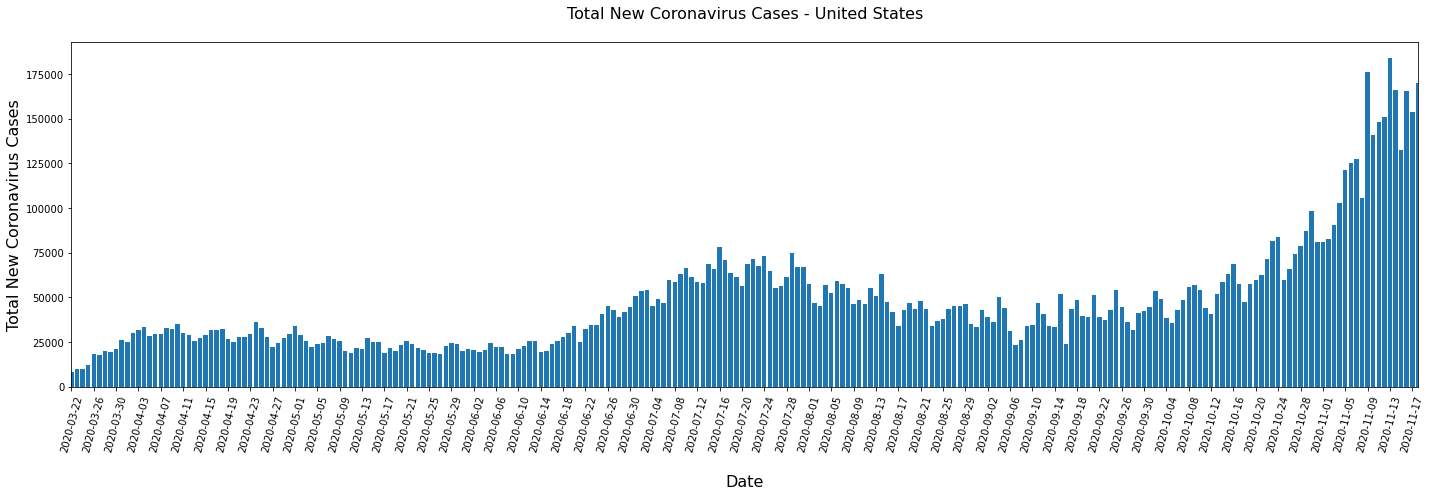

In [51]:
# Create a dataframe to show the trend of total US coronavirus cases by date
tot_us_cases_trend_df = covid_state_df.reset_index().set_index('Date')
tot_cases_gb = tot_us_cases_trend_df.groupby('Date')
tot_us_cases_trend_df = tot_cases_gb[['Total Cases', 'New Cases', 'Total Deaths', 'New Deaths']].sum()
#Export dataframe to .csv file
tot_us_cases_trend_df.to_csv('Resources/tot_us_cases_trend_df.csv')

# Plot the new cases US data as a bar chart
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(tot_us_cases_trend_df.index.values, tot_us_cases_trend_df['New Cases'])
max_date = tot_us_cases_trend_df.index.max()
ax.set_xlim(['2020-03-22',max_date])

# Set the x axis labels to show every 6th day
ax.set_xticks(ax.get_xticks()[::4])
plt.xticks(rotation=75)

# Set the plot titles and labels
# plt.grid(True)
plt.title('Total New Coronavirus Cases - United States\n', fontsize=16)
plt.xlabel('\nDate', fontsize=16)
plt.ylabel('Total New Coronavirus Cases', fontsize=16)
plt.tight_layout()

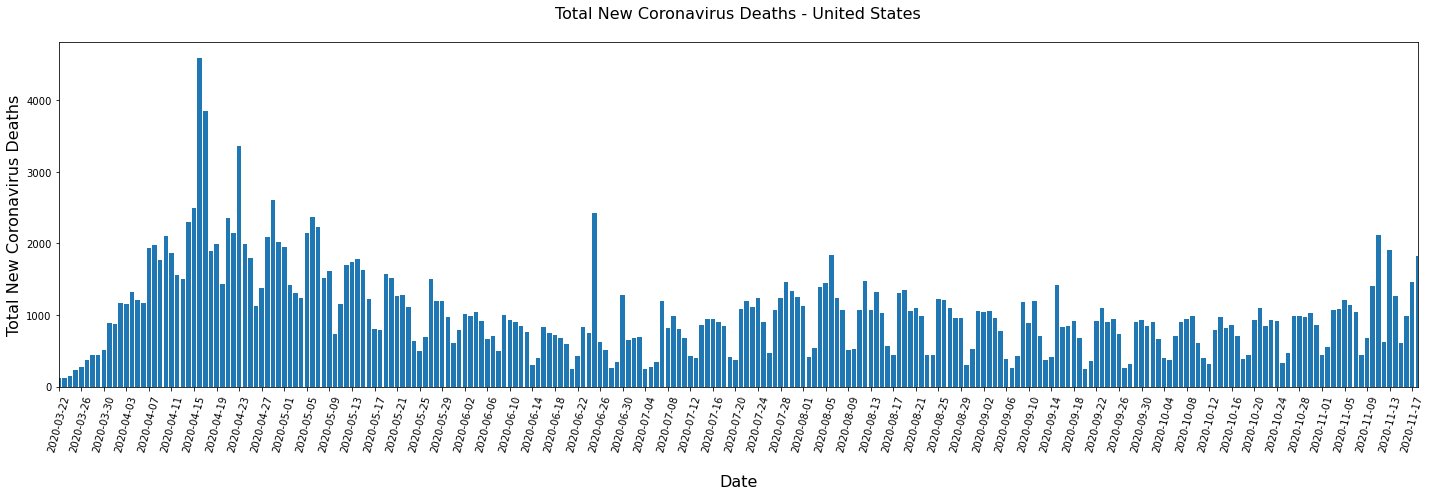

In [52]:
# Plot the new deaths US data as a bar chart
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(tot_us_cases_trend_df.index.values, tot_us_cases_trend_df['New Deaths'])
max_date = tot_us_cases_trend_df.index.max()
ax.set_xlim(['2020-03-22',max_date])

# Set the x axis labels to show every 6th day
ax.set_xticks(ax.get_xticks()[::4])
plt.xticks(rotation=75)

# Set the plot titles and labels
# plt.grid(True)
plt.title('Total New Coronavirus Deaths - United States\n', fontsize=16)
plt.xlabel('\nDate', fontsize=16)
plt.ylabel('Total New Coronavirus Deaths', fontsize=16)
plt.tight_layout()

### Total New Cases and New Deaths in The United States

In [53]:
state_group = covid_state_df.groupby('State')
covid_state_df=covid_state_df.sort_values(by='Date', ascending=False)
last_state_date_df = state_group.last()

# Show the total cases in the US
total_us_cases = last_state_date_df['Total Cases'].sum()
new_us_cases = last_state_date_df['New Cases'].sum()
total_us_deaths = last_state_date_df['Total Deaths'].sum()
new_us_deaths = last_state_date_df['New Deaths'].sum()
date = last_state_date_df['Date'].max()

print(f'Coronavirus stats for The United States as of: {date}')
print("\n"f'Total US Cases: {total_us_cases:,}')
print(f'Total New US Cases: {new_us_cases:,}')
print(f'Total US Deaths: {total_us_deaths:,}')
print(f'Total New US Deaths: {new_us_deaths:,}')

Coronavirus stats for The United States as of: 2020-11-18

Total US Cases: 11,475,931
Total New US Cases: 169,823
Total US Deaths: 249,429
Total New US Deaths: 1,828


### Seven Day Average of New Cases and New Deaths in The United States

In [54]:
us_avg = covid_state_df.reset_index()[['Date', 'New Cases', 'New Deaths']]
us_avg = us_avg.sort_values('Date', ascending=False)
us_avg_gb = us_avg.groupby('Date')
us_avg = us_avg_gb[['Date', 'New Cases', 'New Deaths']].sum()
us_avg = us_avg.sort_index(ascending=False)
us_avg = us_avg.reset_index().head(7)
date = us_avg['Date'].max()

us_avg_new_cases = round(us_avg['New Cases'].mean(),0)
us_avg_new_deaths = round(us_avg['New Deaths'].mean(),0)
print(f'7 Day average as of {date}:\n')
print(f'The seven day average for New Cases in the United States: {us_avg_new_cases:,}')
print(f'The seven day average for New Deaths in the United States: {us_avg_new_deaths:,}')

7 Day average as of 2020-11-18:

The seven day average for New Cases in the United States: 160,306.0
The seven day average for New Deaths in the United States: 1,236.0


### Top 10 States With the Most New Coronavirus Cases

In [55]:
# Show the top 5 states having the most coronavirus cases
last_state_date_df.sort_values(by=['Date', 'New Cases'], ascending=[False,False], inplace=True)
last_state_date_df.head(10)

,Total Cases,New Cases,Total Deaths,New Deaths,Fatality Rate,Latitude,Longitude,Date
State,,,,,,,,
Texas,1091558,12683,20338,191,0.0186,31.0545,-97.5635,2020-11-18
California,1064040,11755,18453,106,0.0173,36.1162,-119.6816,2020-11-18
Illinois,606771,8922,11468,151,0.0189,40.3495,-88.9861,2020-11-18
Wisconsin,350665,8510,2925,58,0.0083,44.2685,-89.6165,2020-11-18
Florida,905248,7925,17731,87,0.0196,27.7663,-81.6868,2020-11-18
Pennsylvania,287425,6468,9463,117,0.0329,40.5908,-77.2098,2020-11-18
Ohio,318828,6385,5827,55,0.0183,40.3888,-82.7649,2020-11-18
Michigan,303058,6218,8573,62,0.0283,43.3266,-84.5361,2020-11-18
Indiana,268222,6015,5084,59,0.0190,39.8494,-86.2583,2020-11-18


### Total Cases by County Heatmap

In [56]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [57]:
# Store Lat and lng into locations
locations = map_county_df[['Latitude', "Longitude"]].astype(float)
total_cases=map_county_df['Total Cases'].astype(float)

In [58]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=total_cases,
                                 dissipating=False, max_intensity=.85,
                                 point_radius=3)                           
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

### Total Coronavirus cases in California

In [59]:
cal_plots_df=state_plots_df[['State', 'Total Cases']]
mask1 = cal_plots_df['State']=='California'
mask2 = cal_plots_df['State'] == 'Indiana'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'Total Covid Cases')

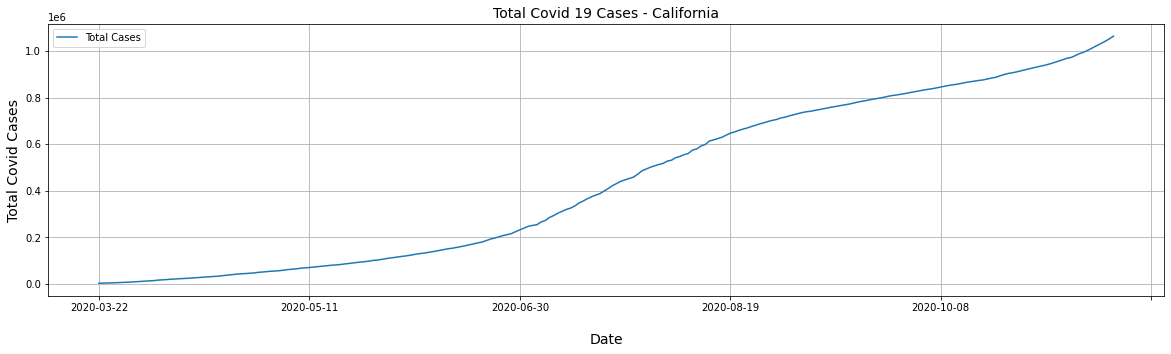

In [60]:
cal_plots_df.plot.line( y='Total Cases', figsize=(20,5), grid=True)

plt.title("Total Covid 19 Cases - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Cases', fontsize=14)

In [61]:
tot_cases_today = last_state_date_df.loc['California']['Total Cases']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of coronavirus cases reported as of {date}: {tot_cases_today:,}')

Total number of coronavirus cases reported as of 2020-11-18: 1,064,040


### Plot New Coronavirus cases in California

In [62]:
cal_plots_df=state_plots_df[['State', 'New Cases']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'New Covid Cases')

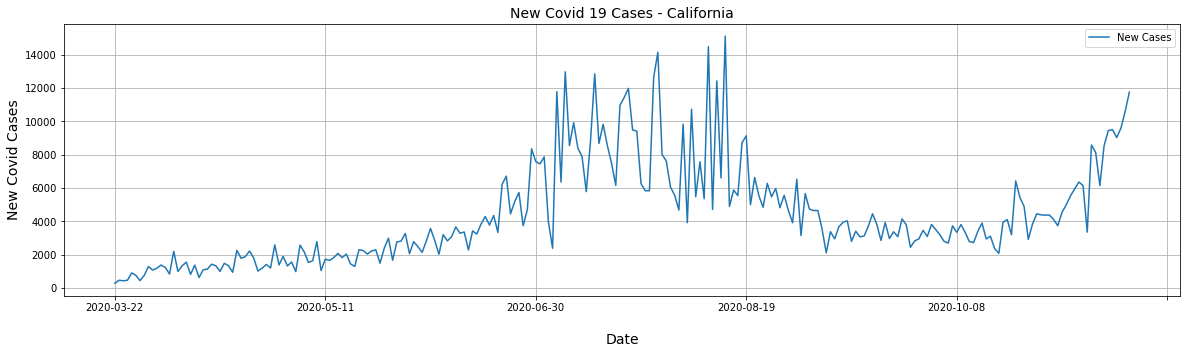

In [63]:
cal_plots_df.plot.line( y='New Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Cases - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Cases', fontsize=14)

In [64]:
new_cases_today = last_state_date_df.loc['California']['New Cases']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of new coronavirus cases reported on {date}: {new_cases_today:,}')

Total number of new coronavirus cases reported on 2020-11-18: 11,755


### Plot Total Coronavirus Deaths in California

In [65]:
cal_plots_df=state_plots_df[['State', 'Total Deaths']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'Total Covid Deaths')

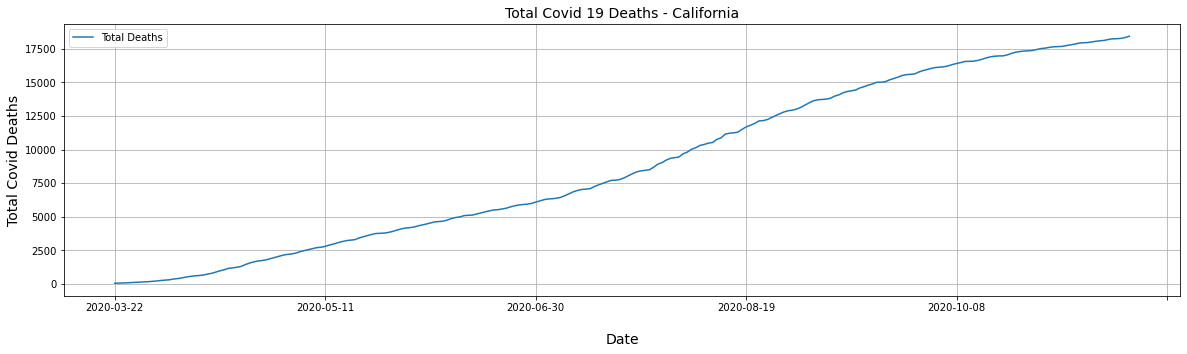

In [66]:
cal_plots_df.plot.line( y='Total Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Deaths - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Deaths', fontsize=14)

In [67]:
tot_deaths = last_state_date_df.loc['California']['Total Deaths']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of coronavirus deaths as of {date}: {tot_deaths:,}')

Total number of coronavirus deaths as of 2020-11-18: 18,453


### Plot New Coronavirus Deaths in California

In [68]:
cal_plots_df=state_plots_df[['State', 'New Deaths']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'New Covid Deaths')

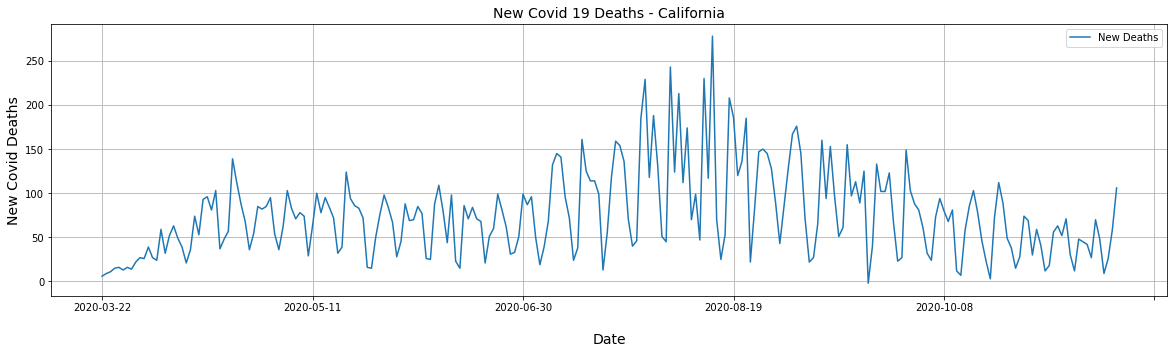

In [69]:
cal_plots_df.plot.line( y='New Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Deaths - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Deaths', fontsize=14)

In [70]:
new_deaths = last_state_date_df.loc['California']['New Deaths']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of new coronavirus deaths reported on {date}: {new_deaths:,}')

Total number of new coronavirus deaths reported on 2020-11-18: 106


### Seven Day Average of New Cases and New Deaths in California

In [71]:
my_idx = covid_state_df.index.name
avg_sev_ca_df = covid_state_df.sort_values(by=[my_idx, 'Date'], ascending = [True, False])
avg_seven_ca_df = avg_sev_ca_df.loc['California'].head(7)
ca_date = avg_seven_ca_df['Date'].max()

avg_seven_ca_df = avg_seven_ca_df[['New Cases', 'New Deaths']].mean()
avg_seven_ca_df = pd.DataFrame(avg_seven_ca_df)

new_cases_avg = round(avg_seven_ca_df.loc['New Cases'][0],0)
new_deaths_avg = round(avg_seven_ca_df.loc['New Deaths'][0],0)
print(f'7 day avg as of: {ca_date}\n')
print(f'The 7 day average of New Cases in CA is {new_cases_avg:,}')
print(f'The 7 day average of New Deaths in CA is {new_deaths_avg:,}')

7 day avg as of: 2020-11-18

The 7 day average of New Cases in CA is 9,781.0
The 7 day average of New Deaths in CA is 49.0


### Total Coronavirus Cases - Los Angeles County, CA

In [72]:
# Create a dataframe based on county information
covid_county_df.sort_values(by='Date', ascending=False, inplace=True)
county_group = covid_county_df.groupby(['State', 'County'])
covid_county_last_df = county_group.first()
covid_county_last_df.sort_values(by=['State', 'New Cases'], ascending=[False, False], inplace=True)

# Show the total coronavirus cases by county in California
california_cases_by_county_df = covid_county_last_df.loc['California']
california_cases_by_county_df

,Total Cases,New Cases,Total Deaths,New Deaths,Date,Latitude,Longitude
County,,,,,,,
Los Angeles,348336,3813,7335,36,2020-11-18,34.308284,-118.228241
San Bernardino,78298,1613,1118,20,2020-11-18,34.840603,-116.177469
San Diego,67241,922,945,12,2020-11-18,33.034846,-116.736533
Riverside,77636,912,1383,9,2020-11-18,33.743150,-115.993358
Orange,66585,628,1528,2,2020-11-18,33.701475,-117.764600
San Joaquin,24171,437,504,3,2020-11-18,37.934337,-121.273006
Sacramento,31387,388,533,6,2020-11-18,38.451068,-121.342537
Santa Clara,29297,274,453,6,2020-11-18,37.231049,-121.697046
Tulare,19320,266,301,1,2020-11-18,36.220266,-118.802020


### Plot Total Coronavirus Cases in Los Angeles County, CA

Text(0, 0.5, 'Total Coronavirus Cases')

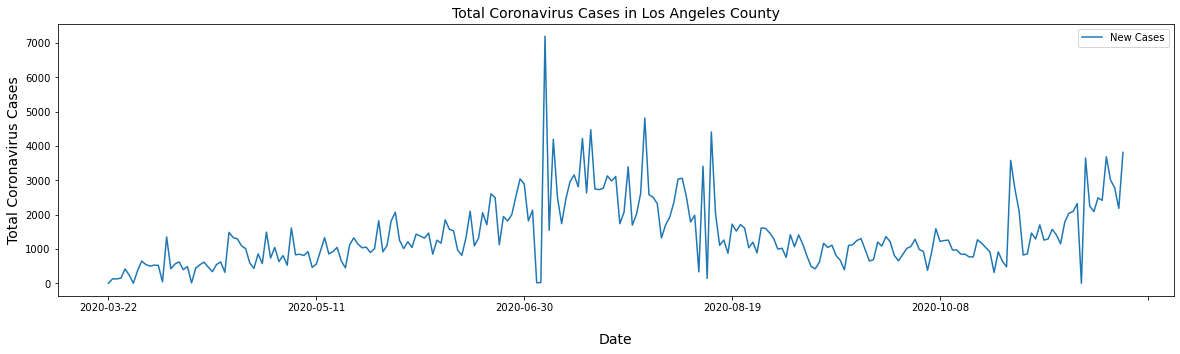

In [73]:
# Plot the number of cases for LA County
la_county_df = covid_county_df.loc['California'][['County','New Cases','Date']]
mask1 = la_county_df['County']=='Los Angeles'
la_county_df=la_county_df[mask1]
la_county_df.sort_values(by='Date', inplace=True)

la_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total Coronavirus Cases in Los Angeles County", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total Coronavirus Cases", fontsize=14)

In [74]:
new_cases_df = la_county_df.sort_values(by='Date', ascending=False).head(1)
new_cases = new_cases_df.loc['California']['New Cases']
date = new_cases_df.loc['California']['Date']
tot_cases = california_cases_by_county_df.loc['Los Angeles']['Total Cases']
print(f'There were {new_cases:,} new cases reported for a total of {tot_cases:,} cases on {date} in LA County, CA.')

There were 3,813 new cases reported for a total of 348,336 cases on 2020-11-18 in LA County, CA.


### Seven Day Average of New Cases and New Deaths in Los Angeles County, CA

In [75]:
la_avg_df = covid_county_df.loc['California']
map_county = la_avg_df['County'] == 'Los Angeles'
la_avg_df = la_avg_df[map_county].reset_index().set_index('County').sort_values(by='Date', ascending=False).head(7)
lac_date = la_avg_df['Date'].max()

la_avg_df = la_avg_df[['New Cases', 'New Deaths']].mean()
la_avg_df = pd.DataFrame(la_avg_df)

la_new_cases_avg = round(la_avg_df.loc['New Cases'][0],0)
la_new_deaths_avg = round(la_avg_df.loc['New Deaths'][0],0)

print(f'7 Day Average as of: {lac_date}\n')
print(f'The 7 day average of New Cases in Los Angeles County, CA: {la_new_cases_avg:,}')
print(f'The 7 day average of New Deaths in Los Angeles County, CA: {la_new_deaths_avg:,}')

7 Day Average as of: 2020-11-18

The 7 day average of New Cases in Los Angeles County, CA: 2,910.0
The 7 day average of New Deaths in Los Angeles County, CA: 17.0


### Total Coronavirus cases in Indiana

In [76]:
ind_plots_df=state_plots_df[['State', 'Total Cases']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'Total Covid Cases')

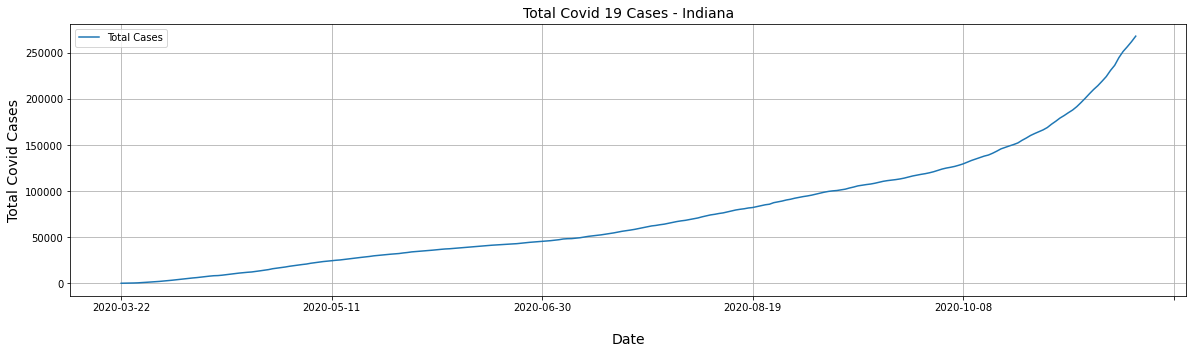

In [77]:
ind_plots_df.plot.line( y='Total Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Cases - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Cases', fontsize=14)

In [78]:
tot_cases_today = last_state_date_df.loc['Indiana']['Total Cases']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of coronavirus cases reported as of {date}: {tot_cases_today:,}')

Total number of coronavirus cases reported as of 2020-11-18: 268,222


### Plot New Coronavirus cases in Indiana

In [79]:
ind_plots_df=state_plots_df[['State', 'New Cases']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'New Covid Cases')

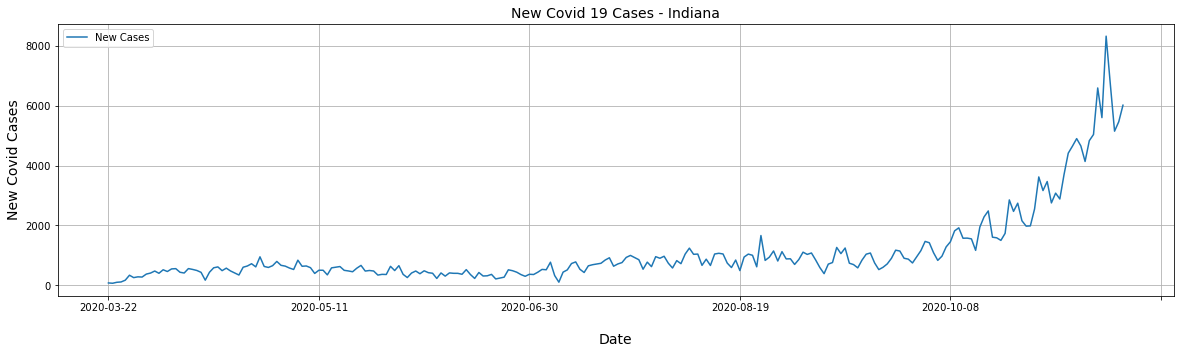

In [80]:
ind_plots_df.plot.line( y='New Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Cases - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Cases', fontsize=14)

In [81]:
new_cases_today = last_state_date_df.loc['Indiana']['New Cases']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of new coronavirus cases reported on {date}: {new_cases_today:,}')

Total number of new coronavirus cases reported on 2020-11-18: 6,015


### Plot Total Coronavirus Deaths in Indiana

In [82]:
ind_plots_df=state_plots_df[['State', 'Total Deaths']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'Total Covid Deaths')

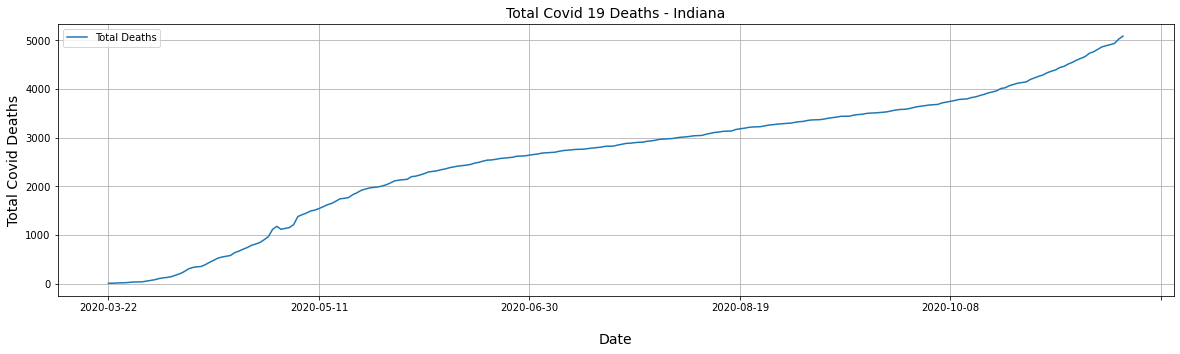

In [83]:
ind_plots_df.plot.line( y='Total Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Deaths - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Deaths', fontsize=14)

In [84]:
tot_deaths = last_state_date_df.loc['Indiana']['Total Deaths']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of coronavirus deaths as of {date}: {tot_deaths:,}')

Total number of coronavirus deaths as of 2020-11-18: 5,084


### Plot New Coronavirus Deaths in Indiana

In [85]:
ind_plots_df=state_plots_df[['State', 'New Deaths']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'New Covid Deaths')

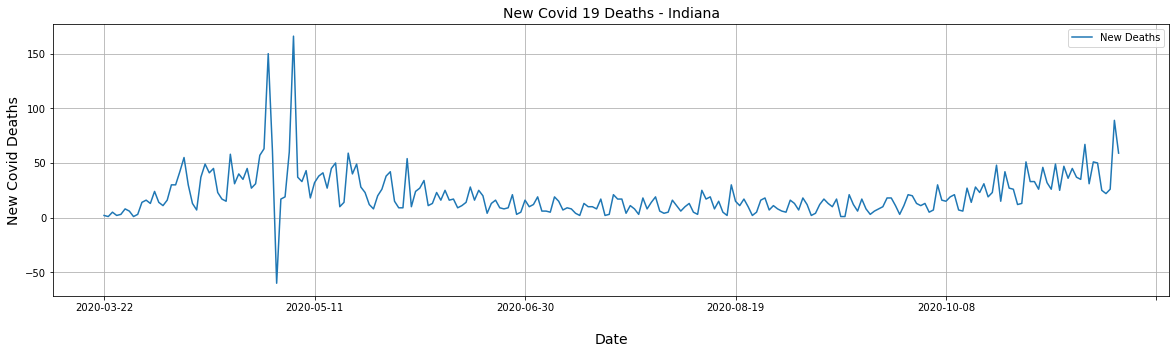

In [86]:
ind_plots_df.plot.line( y='New Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Deaths - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Deaths', fontsize=14)

In [87]:
new_deaths = last_state_date_df.loc['Indiana']['New Deaths']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of new coronavirus deaths reported on {date}: {new_deaths:,}')

Total number of new coronavirus deaths reported on 2020-11-18: 59


### Seven Day Average of New Cases and New Deaths in Indiana

In [88]:
my_idx = covid_state_df.index.name
avg_sev_in_df = covid_state_df.sort_values(by=[my_idx, 'Date'], ascending = [True, False])
avg_seven_in_df = avg_sev_in_df.loc['Indiana'].head(7)
in_date = avg_seven_in_df['Date'].max()

avg_seven_in_df = avg_seven_in_df[['New Cases', 'New Deaths']].mean()
avg_seven_in_df = pd.DataFrame(avg_seven_in_df)
# avg_seven_ca_df

new_cases_avg = round(avg_seven_in_df.loc['New Cases'][0],0)
new_deaths_avg = round(avg_seven_in_df.loc['New Deaths'][0],0)
print(f'7 day avg as of: {in_date}\n')
print(f'The 7 day average of New Cases in IN is {new_cases_avg:,}')
print(f'The 7 day average of New Deaths in IN is {new_deaths_avg:,}')

7 day avg as of: 2020-11-18

The 7 day average of New Cases in IN is 6,264.0
The 7 day average of New Deaths in IN is 46.0


### Coronavirus in Fulton County, IN

In [89]:
# Show the total coronavirus cases by county in Indiana
indiana_cases_by_county_df = covid_county_last_df.loc['Indiana']
indiana_cases_by_county_df

,Total Cases,New Cases,Total Deaths,New Deaths,Date,Latitude,Longitude
County,,,,,,,
Marion,37552,678,828,1,2020-11-18,39.781636,-86.138263
Allen,15343,488,279,8,2020-11-18,41.091943,-85.068006
Lake,23953,365,430,7,2020-11-18,41.418743,-87.382776
Elkhart,15176,298,197,3,2020-11-18,41.597612,-85.858757
St. Joseph,14965,265,204,5,2020-11-18,41.617568,-86.290408
Hamilton,10904,256,155,1,2020-11-18,40.073065,-86.052447
Tippecanoe,7153,172,24,1,2020-11-18,40.388727,-86.894140
Porter,6992,146,69,1,2020-11-18,41.459869,-87.068489
Johnson,5387,142,160,0,2020-11-18,39.489944,-86.101491


### Plot Total Coronavirus Cases in Fulton County, IN

Text(0, 0.5, 'Total New Coronavirus Cases')

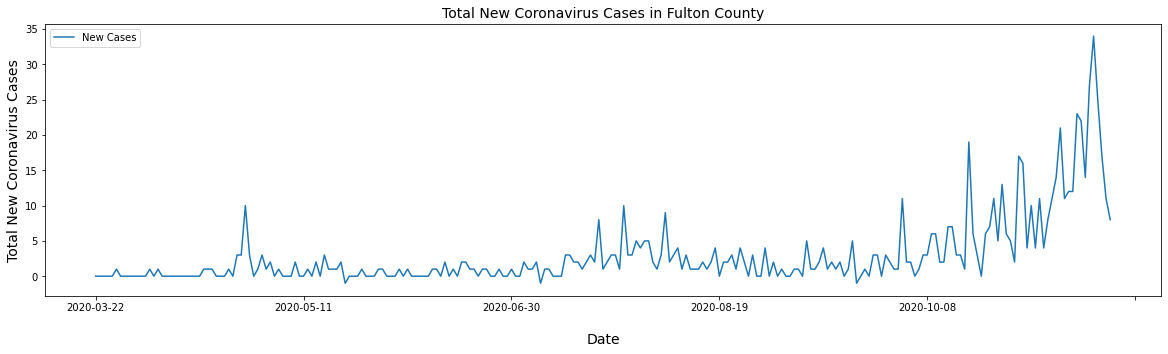

In [90]:
# Plot the number of cases for Fulton County
fulton_county_df = covid_county_df.loc['Indiana'][['County','New Cases','Date']]
mask1 = fulton_county_df['County']=='Fulton'
fulton_county_df=fulton_county_df[mask1]
fulton_county_df.sort_values(by='Date', inplace=True)

fulton_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total New Coronavirus Cases in Fulton County", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total New Coronavirus Cases", fontsize=14)

In [91]:
new_cases_df = fulton_county_df.sort_values(by='Date', ascending=False).head(1)
new_cases = new_cases_df.loc['Indiana']['New Cases']
date = new_cases_df.loc['Indiana']['Date']
tot_cases = indiana_cases_by_county_df.loc['Fulton']['Total Cases']
print(f'There were {new_cases:,} new cases reported for a total of {tot_cases} cases on {date} in Fulton County, IN.')

There were 8 new cases reported for a total of 714 cases on 2020-11-18 in Fulton County, IN.


### Seven Day Average of New Cases and New Deaths in Fulton County, IN

In [92]:
fc_avg_df = covid_county_df.loc['Indiana']
map_county = fc_avg_df['County'] == 'Fulton'
fc_avg_df = fc_avg_df[map_county].reset_index().set_index('County').sort_values(by='Date', ascending=False).head(7)
fc_date = fc_avg_df['Date'].max()

fc_avg_df = fc_avg_df[['New Cases', 'New Deaths']].mean()
fc_avg_df = pd.DataFrame(fc_avg_df)

fc_new_cases_avg = round(fc_avg_df.loc['New Cases'][0],0)
fc_new_deaths_avg = round(fc_avg_df.loc['New Deaths'][0],2)
print(f'7 day average as of: {fc_date}\n')
print(f'The 7 day average of New Cases in Fulton County, IN is {fc_new_cases_avg:,}')
print(f'The 7 day average of New Deaths in Fulton County, IN is {fc_new_deaths_avg:,}')

7 day average as of: 2020-11-18

The 7 day average of New Cases in Fulton County, IN is 19.0
The 7 day average of New Deaths in Fulton County, IN is 0.43


### New Covid Case Data for Santa Clarita Valley, CA

In [93]:
scv_data_path=('Resources/Covid_19_Santa_Clarita_Valley.xlsx')
scv_covid_df = pd.read_excel(scv_data_path)
scv_covid_df.set_index('Date', inplace = True)

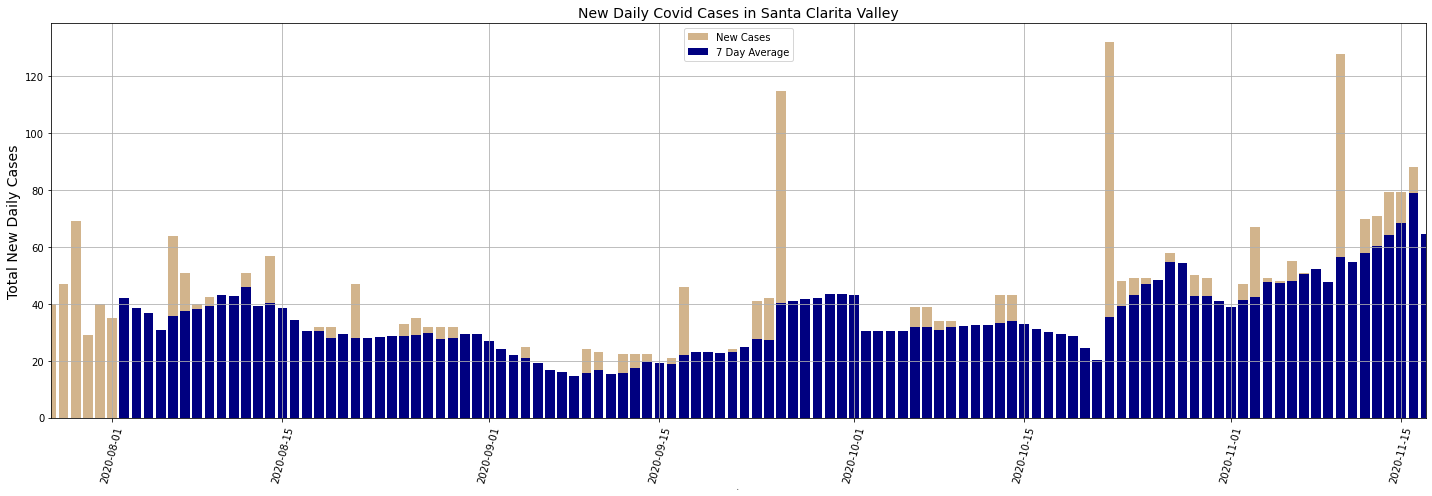

In [94]:
# import the Santa Clarita data into a line chart

# Plot the new cases SCV as a bar chart
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(scv_covid_df.index.values, scv_covid_df['New Cases'], color='tan')
ax.bar(scv_covid_df.index.values, scv_covid_df['7 Day Average'], color='navy')
min_date = scv_covid_df.index.min()
max_date = scv_covid_df.index.max()
ax.set_xlim([min_date,max_date])
ax.legend(['New Cases', '7 Day Average'], loc='best')
ax.grid(True)

# Set the x axis labels to show every 6th day
ax.set_xticks(ax.get_xticks()[::1])
plt.xticks(rotation=75)

# ax.set_xticklabels('date_list')

plt.title('New Daily Covid Cases in Santa Clarita Valley', fontsize=14)
plt.xlabel('Date', fontsize=1)
plt.ylabel('Total New Daily Cases', fontsize=14)
plt.tight_layout()

In [95]:
scv_covid_df = scv_covid_df.sort_index(ascending=False)
scv_covid_avg_df = scv_covid_df.head(7)
date_val = scv_covid_df.index.max().date()
date_val = (f'{date_val.year}-{date_val.month}-{date_val.day}')

tot_cases = scv_covid_avg_df.loc[date_val]['Total Cases'][0]
new_cases = scv_covid_avg_df.loc[date_val]['New Cases'][0]
avg_cases = round(scv_covid_avg_df['New Cases'].mean(),0)

print(f'Covid data in Santa Clarita Valley as of: {date_val}:\n')
print(f'Total covid cases in Santa Clarita Valley: {tot_cases}')
print(f'New covid cases in Santa Clarita Valley: {new_cases}')
print(f'Seven day average of new covid cases in Santa Clarita Valley: {avg_cases}')

Covid data in Santa Clarita Valley as of: 2020-11-17:

Total covid cases in Santa Clarita Valley: 8202.0
New covid cases in Santa Clarita Valley: 26.0
Seven day average of new covid cases in Santa Clarita Valley: 64.0


### Plot New Coronavirus cases in Nevada

In [96]:
nev_plots_df=state_plots_df[['State', 'New Cases']]
mask1 = nev_plots_df['State']=='Nevada'

nev_plots_df = nev_plots_df[mask1]

Text(0, 0.5, 'New Covid Cases')

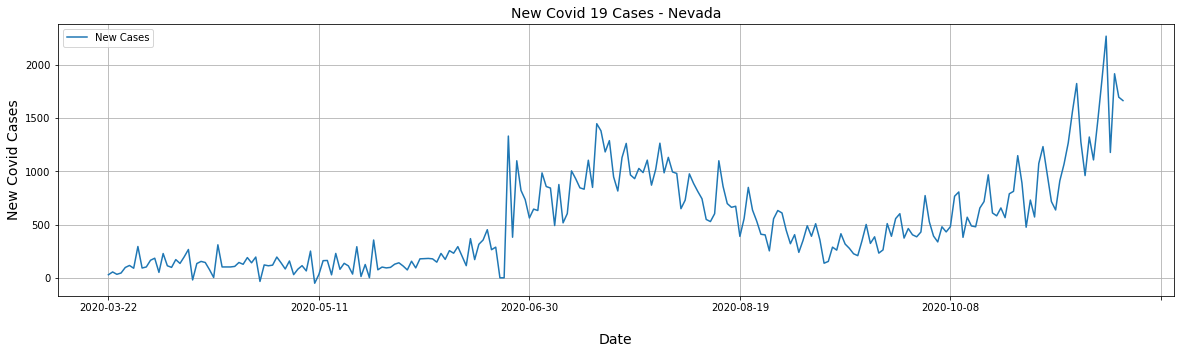

In [97]:
nev_plots_df.plot.line( y='New Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Cases - Nevada", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Cases', fontsize=14)

In [98]:
new_cases_today = last_state_date_df.loc['Nevada']['New Cases']
date = last_state_date_df.loc['Nevada']['Date']
print(f'Total number of new coronavirus cases reported on {date}: {new_cases_today:,}')

Total number of new coronavirus cases reported on 2020-11-18: 1,664


### Seven Day Average of New Cases and New Deaths in Nevada

In [99]:
my_idx = covid_state_df.index.name
avg_sev_nv_df = covid_state_df.sort_values(by=[my_idx, 'Date'], ascending = [True, False])
avg_seven_nv_df = avg_sev_nv_df.loc['Nevada'].head(7)
nv_date = avg_seven_nv_df['Date'].max()

avg_seven_nv_df = avg_seven_nv_df[['New Cases', 'New Deaths']].mean()
avg_seven_nv_df = pd.DataFrame(avg_seven_nv_df)

new_cases_avg = round(avg_seven_nv_df.loc['New Cases'][0],0)
new_deaths_avg = round(avg_seven_nv_df.loc['New Deaths'][0],0)
print(f'7 day avg as of: {nv_date}\n')
print(f'The 7 day average of New Cases in NV is {new_cases_avg:,}')
print(f'The 7 day average of New Deaths in NV is {new_deaths_avg:,}')

7 day avg as of: 2020-11-18

The 7 day average of New Cases in NV is 1,721.0
The 7 day average of New Deaths in NV is 10.0


### Coronavirus Cases by County in Nevada

In [100]:
# Show the total coronavirus cases by county in Indiana
nevada_cases_by_county_df = covid_county_last_df.loc['Nevada']
nevada_cases_by_county_df

,Total Cases,New Cases,Total Deaths,New Deaths,Date,Latitude,Longitude
County,,,,,,,
Clark,98930,1322,1641,0,2020-11-18,36.214589,-115.013024
Washoe,19132,230,222,2,2020-11-18,40.665623,-119.663159
Elko,2133,34,16,0,2020-11-18,41.145316,-115.357762
Lincoln,162,20,1,0,2020-11-18,37.642685,-114.879039
Nye,1078,8,22,1,2020-11-18,38.042643,-116.472270
Douglas,498,5,2,0,2020-11-18,38.912862,-119.617133
Humboldt,245,3,4,0,2020-11-18,41.406922,-118.110943
Lander,148,3,4,0,2020-11-18,39.933223,-117.039707
Lyon,732,3,14,0,2020-11-18,39.017780,-119.187048


Text(0, 0.5, 'Total Coronavirus Cases')

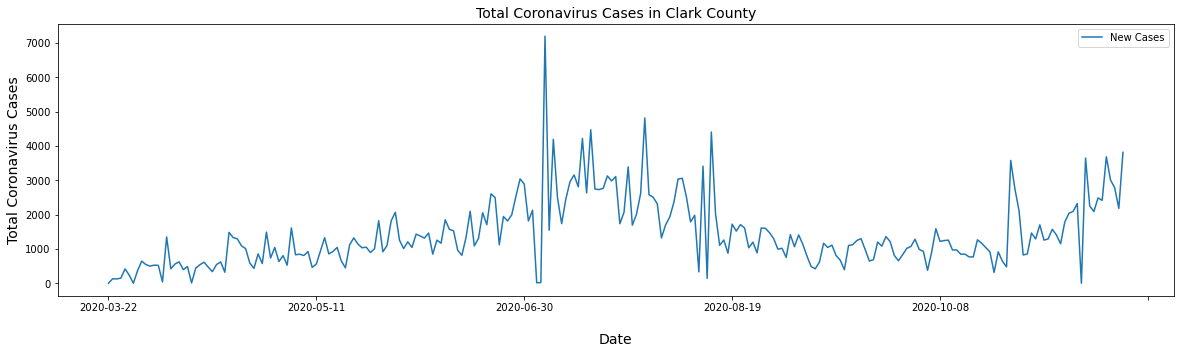

In [101]:
# Plot the number of cases for Clark County
la_county_df = covid_county_df.loc['California'][['County','New Cases','Date']]
mask1 = la_county_df['County']=='Los Angeles'
la_county_df=la_county_df[mask1]
la_county_df.sort_values(by='Date', inplace=True)

la_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total Coronavirus Cases in Clark County", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total Coronavirus Cases", fontsize=14)

### Plot Coronavirus Cases in Clark County, NV

Text(0, 0.5, 'Total New Coronavirus Cases')

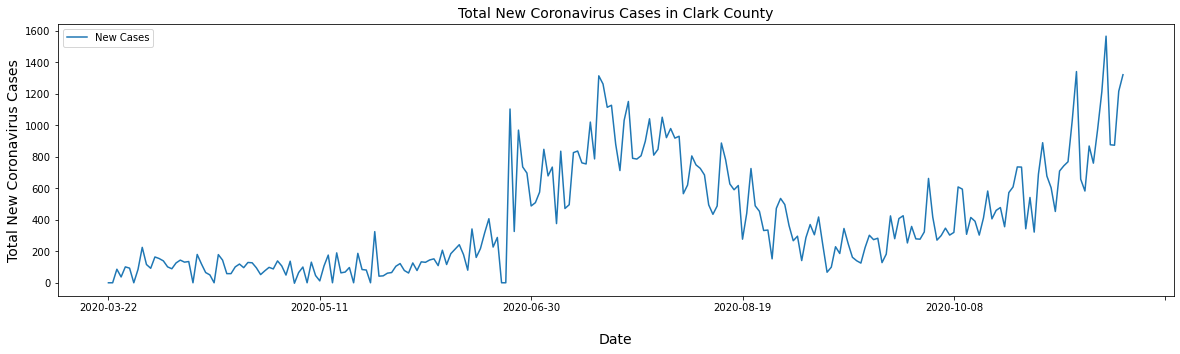

In [102]:
# Plot the number of cases for Clark County
clark_county_df = covid_county_df.loc['Nevada'][['County','New Cases','Date']]
mask1 = clark_county_df['County']=='Clark'
clark_county_df=clark_county_df[mask1]
clark_county_df.sort_values(by='Date', inplace=True)

clark_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total New Coronavirus Cases in Clark County", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total New Coronavirus Cases", fontsize=14)

### Seven Day Average of New Cases and New Deaths in Clark County, NV

In [103]:
cc_avg_df = covid_county_df.loc['Nevada']
map_county = cc_avg_df['County'] == 'Clark'
cc_avg_df = cc_avg_df[map_county].reset_index().set_index('County').sort_values(by='Date', ascending=False).head(7)
cc_date = cc_avg_df['Date'].max()

cc_avg_df = cc_avg_df[['New Cases', 'New Deaths']].mean()
cc_avg_df = pd.DataFrame(cc_avg_df)

cc_new_cases_avg = round(cc_avg_df.loc['New Cases'][0],0)
cc_new_deaths_avg = round(cc_avg_df.loc['New Deaths'][0],2)
print(f'7 day average as of: {cc_date}\n')
print(f'The 7 day average of New Cases in Clark County, NV is {cc_new_cases_avg:,}')
print(f'The 7 day average of New Deaths in Clark County, NV is {cc_new_deaths_avg:,}')

7 day average as of: 2020-11-18

The 7 day average of New Cases in Clark County, NV is 1,149.0
The 7 day average of New Deaths in Clark County, NV is 7.29
